In [ ]:
!pip install pandas numpy scikit-learn transformers torch


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch
import pandas as pd

tokenizer = AutoTokenizer.from_pretrained("indolem/indobertweet-base-uncased")
model = AutoModel.from_pretrained("indolem/indobertweet-base-uncased")

def extract_features(text):
    if isinstance(text, str):
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            outputs = model(**inputs)
        return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()
    return None

df['features'] = df['full_text'].apply(extract_features)
print(df['features'].head())

In [61]:
import pandas as pd

df = pd.read_csv("../data/data_fix.csv")

In [62]:
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,indobert_feature_71,indobert_feature_72,indobert_feature_73,indobert_feature_74,indobert_feature_75,indobert_feature_76,indobert_feature_77,indobert_feature_78,indobert_feature_79,indobert_feature_80
0,1.538779e+18,2022-06-20 07:01:14+00:00,5.0,#JokowiMatikanDemokrasi #JokowiMatikanDemokrasi,1.538779e+18,https://pbs.twimg.com/media/FVrXVWnUYAEBDfI.jpg,NaN,qme,NaN,0.0,...,-0.312094,0.980298,-0.497925,1.602446,-0.254567,-0.520526,-0.353177,-1.112838,-0.001756,-0.027748
1,1.538783e+18,2022-06-20 07:16:30+00:00,4.0,Polisi kalah sama lont... #JokowiMatikanDemokr...,1.538783e+18,https://pbs.twimg.com/media/FVra02UUAAAJ4-R.jpg,NaN,in,NaN,0.0,...,-0.409329,0.674773,-0.127567,0.804900,-0.329457,-0.290906,-0.106401,0.068177,0.417723,-0.022249
2,1.538783e+18,2022-06-20 07:17:55+00:00,10.0,Setuju #JokowiMatikanDemokrasi #JokowiMatikanD...,1.538783e+18,https://pbs.twimg.com/media/FVrbJuBUYAAbmJH.jpg,NaN,in,NaN,0.0,...,-0.204514,0.745370,-0.635906,1.242655,-0.276266,-0.039602,-0.501906,-1.205206,0.055984,-0.102962
3,1.538783e+18,2022-06-20 07:18:41+00:00,20.0,Bubarkan KPK. #JokowiMatikanDemokrasi #JokowiM...,1.538783e+18,https://pbs.twimg.com/media/FVrbU4oUUAE3aS8.jpg,NaN,in,NaN,3.0,...,-0.228128,0.552171,-0.218623,1.189514,-0.291000,-0.466457,-0.305309,-0.516276,0.302189,0.132921
4,1.538786e+18,2022-06-20 07:27:45+00:00,0.0,Rakyat maunya jokowi legowo MUNDUR. #JokowiMat...,1.538786e+18,https://pbs.twimg.com/media/FVrdZ7iUUAQBg2M.jpg,NaN,in,NaN,0.0,...,-0.081445,0.669836,-0.144411,0.584860,-0.471251,-0.212964,-0.327029,-0.617646,0.011081,0.291943


In [63]:
df["username"].value_counts()

username
OposisiCerdas     1915
geloraco          1893
ManiseWidiarti    1557
SantorinisSun     1467
ruhutsitompul     1299
Nicho_Silalahi    1283
SahabatSaber      1276
panca66           1153
PartaiSocmed      1027
__LOVE_AG4EVER     980
ekowboy2           928
Name: count, dtype: int64

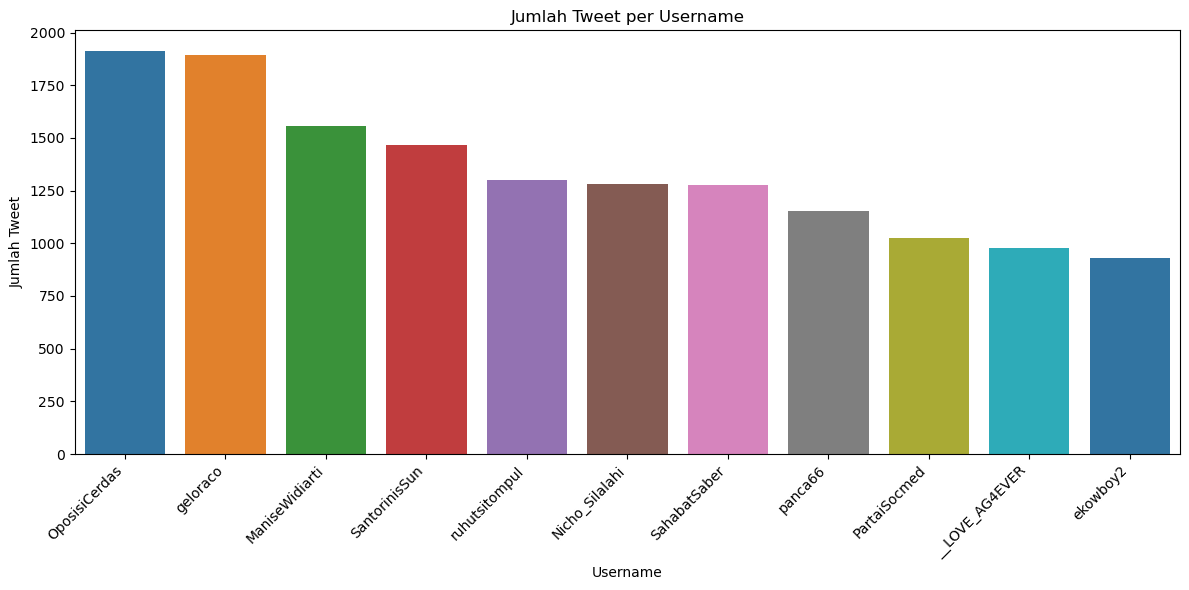

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
user_counts = df["username"].value_counts().reset_index()
user_counts.columns = ['username', 'tweet_count']
# Visualisasi vertikal dengan warna kontras
plt.figure(figsize=(12, 6))
sns.barplot(x='username', y='tweet_count', data=user_counts, palette='tab10')

plt.title('Jumlah Tweet per Username')
plt.xlabel('Username')
plt.ylabel('Jumlah Tweet')
plt.xticks(rotation=45, ha='right')  # Rotasi agar label tidak saling menumpuk
plt.tight_layout()
plt.show()

In [3]:
for i in df.columns:
    print(i)

conversation_id_str
created_at
favorite_count
full_text
id_str
image_url
in_reply_to_screen_name
lang
location
quote_count
reply_count
retweet_count
tweet_url
user_id_str
username
full_text_clean
full_text_clean_2
features
cluster
ttr
avg_word_length
avg_syllables_per_word
avg_word_frequency
functional_word_count
uber_index
hd_d_index
tuldava_measure_u
yules_k
shannon_entropy
simpsons_index
flesch_kincaid
dale_chall
linsear_write
gunning_fog
double_dot_count
url_count
hashtag_count
mention_count
pca_feature_1
pca_feature_2
pca_feature_3
pca_feature_4
pca_feature_5
pca_feature_6
pca_feature_7
pca_feature_8
pca_feature_9
pca_feature_10
pca_feature_11
pca_feature_12
pca_feature_13
pca_feature_14
pca_feature_15
pca_feature_16
pca_feature_17
pca_feature_18
pca_feature_19
kmeans_cluster
gmm_cluster
word_count
comma_count
comma_ratio
period_count
period_ratio
semicolon_count
semicolon_ratio
colon_count
colon_ratio
question_mark_count
question_mark_ratio
exclamation_mark_count
exclamation_mark

In [4]:
indobert = [
    'indobert_feature_1', 'indobert_feature_2', 'indobert_feature_3', 
    'indobert_feature_4', 'indobert_feature_5', 'indobert_feature_6', 
    'indobert_feature_7', 'indobert_feature_8', 'indobert_feature_9', 
    'indobert_feature_10', 'indobert_feature_11', 'indobert_feature_12', 
    'indobert_feature_13', 'indobert_feature_14', 'indobert_feature_15', 
    'indobert_feature_16', 'indobert_feature_17', 'indobert_feature_18', 
    'indobert_feature_19', 'indobert_feature_20', 'indobert_feature_21', 
    'indobert_feature_22', 'indobert_feature_23', 'indobert_feature_24', 
    'indobert_feature_25', 'indobert_feature_26', 'indobert_feature_27', 
    'indobert_feature_28', 'indobert_feature_29', 'indobert_feature_30', 
    'indobert_feature_31', 'indobert_feature_32', 'indobert_feature_33', 
    'indobert_feature_34', 'indobert_feature_35', 'indobert_feature_36', 
    'indobert_feature_37', 'indobert_feature_38', 'indobert_feature_39', 
    'indobert_feature_40', 'indobert_feature_41', 'indobert_feature_42', 
    'indobert_feature_43', 'indobert_feature_44', 'indobert_feature_45', 
    'indobert_feature_46', 'indobert_feature_47', 'indobert_feature_48', 
    'indobert_feature_49', 'indobert_feature_50', 'indobert_feature_51', 
    'indobert_feature_52', 'indobert_feature_53', 'indobert_feature_54', 
    'indobert_feature_55', 'indobert_feature_56', 'indobert_feature_57', 
    'indobert_feature_58', 'indobert_feature_59', 'indobert_feature_60', 
    'indobert_feature_61', 'indobert_feature_62', 'indobert_feature_63', 
    'indobert_feature_64',  'indobert_feature_65',
 'indobert_feature_66',
 'indobert_feature_67',
 'indobert_feature_68',
 'indobert_feature_69',
 'indobert_feature_70',
 'indobert_feature_71',
 'indobert_feature_72',
 'indobert_feature_73',
 'indobert_feature_74',
 'indobert_feature_75',
 'indobert_feature_76',
 'indobert_feature_77',
 'indobert_feature_78',
 'indobert_feature_79',
 'indobert_feature_80'
]

stilistik = [
    # Penggunaan tanda baca
    'comma_count', 'comma_ratio',
    'period_count', 'period_ratio',
    'semicolon_count', 'semicolon_ratio',
    'colon_count', 'colon_ratio',
    'question_mark_count', 'question_mark_ratio',
    'exclamation_mark_count', 'exclamation_mark_ratio',
    'dash_count', 'dash_ratio',
    'parentheses_open_count', 'parentheses_open_ratio',
    'parentheses_close_count', 'parentheses_close_ratio',
    'brackets_open_count', 'brackets_open_ratio',
    'brackets_close_count', 'brackets_close_ratio',
    'quotation_count', 'quotation_ratio',
    'ellipsis_count', 'ellipsis_ratio',

    'total_punct_count', 'total_punct_ratio',
    'sequential_punct_count', 'sentence_initial_punct',
    'nonstandard_sentence_end', 'punct_diversity',
    
    # Jenis kata
    'function_word_count', 'content_word_count',
    'function_ratio', 'content_ratio',
    'function_to_content_ratio', 'unique_function_words',
    'functional_word_count',
    'prepositions_count', 'prepositions_ratio',
    'conjunctions_count', 'conjunctions_ratio',
    'pronouns_count', 'pronouns_ratio',
    'auxiliaries_count', 'auxiliaries_ratio',
    
    # Marker linguistik
    'marker_jadi',
    'marker_maka_dari_itu', 'marker_menurut_saya',
    'marker_bagi_saya', 'marker_faktanya',
    'total_markers_count', 'markers_ratio',
    
    # Pola penggunaan kata
    # 'top_first_word', 'top_first_word_freq',
    # 'top_last_word', 'top_last_word_freq',
    # 'favorite_2gram', 'favorite_2gram_freq',
    # 'favorite_3gram', 'favorite_3gram_freq',
    'double_dot_count',
    # Fitur web/sosial media 
    'url_count', 'hashtag_count', 'mention_count'
]

# Fitur IndoBERT - fitur embedding yang dihasilkan dari model IndoBERT

# Fitur statistik teks - terkait dengan ukuran statistik dari teks
Statistik = [
    # Statistik dasar teks
    'word_count',
    'ttr',  # Type-Token Ratio
    'avg_word_length',
    'avg_syllables_per_word',
    'avg_word_frequency',
    
    # Indeks keragaman leksikal
    'uber_index',
    'hd_d_index',
    'tuldava_measure_u', 
    'yules_k',
    'shannon_entropy',
    'simpsons_index',
    
    # Indeks keterbacaan
    'flesch_kincaid',
    'dale_chall',
    'linsear_write',
    'gunning_fog',
]

In [5]:
df[stilistik]

,comma_count,comma_ratio,period_count,period_ratio,semicolon_count,semicolon_ratio,colon_count,colon_ratio,question_mark_count,question_mark_ratio,...,marker_maka_dari_itu,marker_menurut_saya,marker_bagi_saya,marker_faktanya,total_markers_count,markers_ratio,double_dot_count,url_count,hashtag_count,mention_count
0,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,3,0.500000,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,1,0.250000,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,0,0.0,1,0.142857,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14773,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
14774,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0.0,1.0,0.0,0.0,0.0
14775,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
14776,0,0.0,0,0.000000,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [6]:
fitur_penting_author_attribution = [
    # === FITUR STATISTIK TEKS (Paling Kritis) ===
    'word_count',                    # Panjang tweet - karakteristik kuat penulis
    'ttr',                           # Type-Token Ratio - keragaman kosakata
    'avg_word_length',              # Rata-rata panjang kata
    'avg_syllables_per_word',       # Kompleksitas kata
    'shannon_entropy',              # Entropi informasi - keragaman linguistik
    'yules_k',                      # Ukuran keragaman leksikal yang robust

    # === FITUR TANDA BACA (Sangat Kritis untuk Tweet) ===
    'comma_ratio',                  # Penggunaan koma relatif
    'period_ratio',                 # Penggunaan titik relatif
    'exclamation_mark_ratio',       # Emosi/penekanan - khas untuk tweet
    'question_mark_ratio',          # Gaya bertanya
    'ellipsis_count',               # Titik tiga - gaya informal
    'quotation_count',              # Penggunaan kutip
    'total_punct_ratio',            # Total penggunaan tanda baca
    'punct_diversity',              # Keragaman tanda baca

    # === FITUR JENIS KATA (Penting untuk Gaya Bahasa) ===
    'function_ratio',               # Rasio kata fungsi
    'content_ratio',                # Rasio kata konten
    'function_to_content_ratio',    # Perbandingan kata fungsi vs konten
    'pronouns_ratio',               # Penggunaan kata ganti - sangat personal
    'conjunctions_ratio',           # Gaya menghubungkan ide
    'prepositions_ratio',           # Kompleksitas struktur kalimat

    # === FITUR MARKER LINGUISTIK (Spesifik Bahasa Indonesia) ===
    'marker_jadi',                  # Marker "jadi" - khas informal Indonesia
    'marker_menurut_saya',          # Ekspresi opini personal
    'marker_bagi_saya',             # Ekspresi perspektif personal
    'marker_faktanya',              # Marker argumentasi
    'total_markers_count',          # Total marker linguistik
    'markers_ratio',                # Rasio penggunaan marker

    # === FITUR MEDIA SOSIAL (Esensial untuk Tweet) ===
    'hashtag_count',                # Penggunaan hashtag
    'mention_count',                # Penggunaan mention (@)
    'url_count',                    # Berbagi link

    # === FITUR TAMBAHAN YANG RELEVAN ===
    'double_dot_count',             # Penggunaan titik ganda (..)
    'avg_word_frequency',           # Penggunaan kata umum vs jarang

    # === FITUR N-GRAM DAN STRUKTUR KATA TAMBAHAN ===
    'char_2gram_freq_top10',        # Frekuensi 10 karakter bigram teratas
    'char_3gram_freq_top10',        # Frekuensi 10 karakter trigram teratas  
    'vowel_consonant_ratio',        # Rasio vokal dan konsonan
    'reduplication_count',          # Jumlah kata ulang
    'prefix_count',                 # Jumlah prefiks
    'suffix_count'                  # Jumlah sufiks
]

In [11]:
# tweet_columns = [
#     'conversation_id_str',
#     'created_at',
#     'favorite_count',
#     'full_text',
#     'id_str',
#     'image_url',
#     'in_reply_to_screen_name',
#     'lang',
#     'location',
#     'quote_count',
#     'reply_count',
#     'retweet_count',
#     'tweet_url',
#     'user_id_str',
#     'username',
#     'full_text_clean',
#     'full_text_clean_2'
# ]

# # Menambahkan fitur IndoBERT (1-80)
# indobert_features = [f'indobert_feature_{i}' for i in range(1, 81)]

# # Menggabungkan semuanya dalam satu list
# all_columns = tweet_columns + indobert_features
# df_indobert = df[all_columns]

# df_indobert.to_csv("../data/data_fix_indobert.csv",index=False)

In [10]:
df = pd.read_csv("../data/data_fix_indobert.csv")
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,indobert_feature_71,indobert_feature_72,indobert_feature_73,indobert_feature_74,indobert_feature_75,indobert_feature_76,indobert_feature_77,indobert_feature_78,indobert_feature_79,indobert_feature_80
0,1.538779e+18,2022-06-20 07:01:14+00:00,5.0,#JokowiMatikanDemokrasi #JokowiMatikanDemokrasi,1.538779e+18,https://pbs.twimg.com/media/FVrXVWnUYAEBDfI.jpg,NaN,qme,NaN,0.0,...,-0.312094,0.980298,-0.497925,1.602446,-0.254567,-0.520526,-0.353177,-1.112838,-0.001756,-0.027748
1,1.538783e+18,2022-06-20 07:16:30+00:00,4.0,Polisi kalah sama lont... #JokowiMatikanDemokr...,1.538783e+18,https://pbs.twimg.com/media/FVra02UUAAAJ4-R.jpg,NaN,in,NaN,0.0,...,-0.409329,0.674773,-0.127567,0.804900,-0.329457,-0.290906,-0.106401,0.068177,0.417723,-0.022249
2,1.538783e+18,2022-06-20 07:17:55+00:00,10.0,Setuju #JokowiMatikanDemokrasi #JokowiMatikanD...,1.538783e+18,https://pbs.twimg.com/media/FVrbJuBUYAAbmJH.jpg,NaN,in,NaN,0.0,...,-0.204514,0.745370,-0.635906,1.242655,-0.276266,-0.039602,-0.501906,-1.205206,0.055984,-0.102962
3,1.538783e+18,2022-06-20 07:18:41+00:00,20.0,Bubarkan KPK. #JokowiMatikanDemokrasi #JokowiM...,1.538783e+18,https://pbs.twimg.com/media/FVrbU4oUUAE3aS8.jpg,NaN,in,NaN,3.0,...,-0.228128,0.552171,-0.218623,1.189514,-0.291000,-0.466457,-0.305309,-0.516276,0.302189,0.132921
4,1.538786e+18,2022-06-20 07:27:45+00:00,0.0,Rakyat maunya jokowi legowo MUNDUR. #JokowiMat...,1.538786e+18,https://pbs.twimg.com/media/FVrdZ7iUUAQBg2M.jpg,NaN,in,NaN,0.0,...,-0.081445,0.669836,-0.144411,0.584860,-0.471251,-0.212964,-0.327029,-0.617646,0.011081,0.291943


In [34]:
import pandas as pd
import re
import string
from urllib.parse import urlparse

def clean_tweet_dataframe(df, text_column='full_text', username_column='username', min_tweet_length=5, min_tweets_per_user=3):
    """
    Comprehensive tweet cleaning function for Indonesian tweets
    
    Parameters:
    - df: pandas DataFrame containing tweet data
    - text_column: name of column containing tweet text
    - username_column: name of column containing usernames
    - min_tweet_length: minimum number of words required after cleaning
    - min_tweets_per_user: minimum number of tweets required per user
    
    Returns:
    - cleaned_df: pandas DataFrame with cleaned tweets
    """
    
    # Stopwords list (updated based on your requirements)
    stopwords = [
        'yang', 'di', 'dan', 'ini', 'yg', 'itu', 'ada', 'ha', 'jadi', 'ke', 'dari',
        'ya', 'tidak', 'untuk', 'presiden', 'pak', 'amp', 'bisa', 'kita', 'tapi',
        'juga', 'a', 'sudah', 'aja', 'dengan', 'n', 't', 'lagi', 'karena',
        'akan', 'bukan', 'jangan', 'ga', 'apa', 'harus', 'orang', 'masih',
        'mas', 'kami', 'negara', 'mau', 'dulu', 'aku', 'saja', 'pada', 'g',
        'dalam', 'kalau', 'banyak', 'baru', 'sekarang', 'selamat', 'lebih',
        'tak', 'saya', 'semua', 'satu', 'hanya', 'udah', 'jika', 'kalo', 'e',
        'cuma', 'saat', 'punya', 'atau', 'banget', 'sama', 'i', 'kan', 'sih',
        'kok', 'wkwkwk', 'hahaha', 'dgn', '&amp;'
    ]
    
    # Hashtag mapping dictionary
    hashtags_dict = {
        '#bongkarpembantaikm50': 'bongkar pembantai km50',
        '#makzulkanpresidenpengkhianat': 'makzulkan presiden pengkhianat',
        '#fadilharusdicopot': 'fadil harus dicopot',
        '#novumbaruperkarakm50': 'novum baru perkara km50',
        '#hancurkanmafiasambo': 'hancurkan mafia sambo',
        '#seretsambopenjagalkm50': 'seret sambo penjagal km50',
        '#jokowimatikandemokrasi': 'jokowi matikan demokrasi',
        '#sertifikatpalsupresiden': 'sertifikat palsu presiden',
        '#presidenbebeklumpuh': 'presiden bebek lumpuh',
        '#indonesiadijajahaseng': 'indonesia dijajah aseng',
        '#bubarkansatgassusmp': 'bubarkan satgas susmp',
        '#basmimafiapolri': 'basmi mafia polri',
        '#bbmmeroketjokowiturun': 'bbm meroket jokowi turun',
        '#jokowipdipberkhianat': 'jokowi pdip berkhianat',
        '#hilangnyajiwacorsatni': 'hilangnya jiwa corsatni',
        '#hyperinflasijatuhkanjokowi': 'hyperinflasi jatuhkan jokowi',
        '#squadpenjagalkm5o': 'squad penjagal km5o',
        '#turunkanjokowipengkhianat': 'turunkan jokowi pengkhianat',
        '#jokowitakutrevolusirakyat': 'jokowi takut revolusi rakyat',
        '#makzulkanpresidenboneka': 'makzulkan presiden boneka',
        '#ekonomigagalmeroket': 'ekonomi gagal meroket',
        '#makbantengrasis': 'mak banteng rasis',
        '#kembalikanmartabatpolri': 'kembalikan martabat polri',
        '#ganjarmahfud2024': 'ganjar mahfud 2024',
        '#presidenpenipurakyat': 'presiden penipu rakyat',
        '#copotmenteridongok': 'copot menteri dongok',
        '#demokrasikriminalpt20': 'demokrasi kriminal pt20',
        '#aminajadulu': 'amina jadulu',
        '#bubarkandprpengkhianat': 'bubarkan dpr pengkhianat',
        '#kenapajokowitakutanies': 'kenapa jokowi takut anies',
        '#rakyatdibungkamrkuhp': 'rakyat dibungkam rkuhp',
        '#revolusijatuhkanjokowi': 'revolusi jatuhkan jokowi',
        '#aminkanindonesia': 'amin kan indonesia',
        '#revolusiuntukindonesia': 'revolusi untuk indonesia',
        '#bubarkankpkunfaedah': 'bubarkan kpk unfaedah',
        '#usutkorupsi2bocil': 'usut korupsi 2 bocil',
        '#kaburajadulu': 'kabur aja dulu',
        '#hukumberatferdysambo': 'hukum berat ferdy sambo',
        '#desakanies': 'desak anies',
        '#indonesiagelap': 'indonesia gelap',
        '#periksafadil': 'periksa fadil',
        '#ribukannegerikomunis': 'ribukan negeri komunis',
        '#2024singkirkanpdip': '2024 singkirkan pdip',
        '#kumpulakbarjis01': 'kumpul akbar jis01',
        '#debatcapres': 'debat capres',
        '#gantungmatikudetakonstitusi': 'gantung matiku detakonstitusi',
        '#turunkanrezimmaling': 'turunkan rezim maling',
        '#bbmtumbangkanjokowi': 'bbm tumbangkan jokowi',
        '#aniesfinalstage': 'anies final stage',
        '#harganaikjokowiturun': 'harga naik jokowi turun',
        '#aminmenang': 'amin menang',
        '#indonesiasemakinhancur': 'indonesia semakin hancur',
        '#debatcawapres': 'debat cawapres',
        '#turunkanjokowiadalahsolusi': 'turunkan jokowi adalah solusi',
        '#masihadakahpolisibaik': 'masih adakah polisi baik',
        '#bipengngibulindunia': 'bi pengngibul in dunia',
        '#aforevery1': 'a for every1',
        '#pahitmaniesalwayswithanies': 'pahit manies always with anies',
        '#rakyattolakrkuhp': 'rakyat tolak rkuhp',
        '#rakyatmelawanmandatory': 'rakyat melawan mandatory',
        '#jokowiperusakbangsa': 'jokowi perusak bangsa',
        '#humaniescsenobar': 'humanies csenobar',
        '#iminrocksdebate': 'imin rocks debate',
        '#aminterbaiknomor1': 'amin terbaik nomor 1',
        '#aminungguldebatcapres': 'amin unggul debat capres',
        '#berjihadbelakonstitusi': 'berjihad bela konstitusi',
        '#auditsatgassusmp': 'audit satgas susmp',
        '#turunkanrezimtirani': 'turunkan rezim tirani',
        '#saveindonesiaexitwho': 'save indonesia exit who',
        '#exitwhonomoreplandemic': 'exit who no more plandemic',
        '#kampusbergerak': 'kampus bergerak',
        '#satuamin': 'satu amin',
        '#aparatbobrok': 'aparat bobrok',
        '#dapse': 'dapse',
        '#ber1beraniberubah': 'ber1 berani berubah',
        '#takeanieslookatjakarta': 'take anies look at jakarta',
        '#satukanindonesia': 'satukan indonesia',
        '#rakyatcerdastolak3periode': 'rakyat cerdas tolak 3 periode',
        '#kpubiangkerokpemilu2024': 'kpu biang kerok pemilu 2024',
        '#ganjarpinokiovarianbaru': 'ganjar pinokio varian baru',
        '#reformasipolri': 'reformasi polri',
        '#dharmapongrekun': 'dharma pongrekun',
        '#tangkapmulyono': 'tangkap mulyono',
        '#jakartamenyala': 'jakarta menyala',
        '#dukunghakangket': 'dukung hak angket',
        '#01aminwinelection': '01 amin win election',
        '#pramdoeljuarajakarta': 'pram doel juara jakarta',
        '#revolusiikan': 'revolusi ikan',
        '#studymakeschaimwin': 'study makes chaim win',
        '#desakaniessamarinda': 'desak anies samarinda',
        '#aminbangunstadion': 'amin bangun stadion',
        '#aniesmuhaimin2024': 'anies muhaimin 2024',
        '#aminsatukanindonesia': 'amin satukan indonesia',
        '#bukakembalikm50': 'buka kembali km50',
        '#polisikecewakanrakyat': 'polisi kecewakan rakyat',
        '#usutkembalitragedikm50': 'usut kembali tragedi km50',
        '#lawanrezimbaper': 'lawan rezim baper',
        '#auditutang7600t': 'audit utang 7600t',
        '#kunwardana': 'kunwardana',
        '#calonindependen': 'calon independen'
    }
    
    def clean_single_tweet(text):
        """Clean a single tweet text"""
        if pd.isna(text) or text == '':
            return ''
        
        # Convert to string and lowercase
        text = str(text).lower()
        
        # 1. Remove URLs
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
        text = re.sub(r'www\.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)
        text = re.sub(r'\b(?:bit\.ly|t\.co|tinyurl\.com|goo\.gl|short\.link)\/\S+', '', text)
        
        # 2. Remove symbols and special characters
        text = re.sub(r'@\w+', '', text)  # Remove mentions
        text = re.sub(r'RT\s+', '', text)  # Remove RT (retweet)
        
        # 3. Handle hashtags - replace mapped hashtags with their meanings
        for hashtag, meaning in hashtags_dict.items():
            text = text.replace(hashtag, meaning)
        
        # 4. Remove # symbols from non-mapped hashtags
        hashtags_in_text = re.findall(r'#\w+', text)
        for hashtag in hashtags_in_text:
            if hashtag not in hashtags_dict:
                text = text.replace(hashtag, hashtag[1:])
        
        # 5. Remove HTML entities
        text = re.sub(r'&[a-zA-Z0-9]+;', '', text)
        text = re.sub(r'&lt;', '<', text)
        text = re.sub(r'&gt;', '>', text)
        text = re.sub(r'&amp;', '&', text)
        text = re.sub(r'&quot;', '"', text)
        
        # 6. Remove repeated characters (e.g., bagusssss -> bagus)
        text = re.sub(r'(.)\1{2,}', r'\1\1', text)
        
        
        
        # 8. Remove caption indicators
        caption_patterns = [
            r'caption\s*:',
            r'foto\s*:',
            r'gambar\s*:',
            r'sumber\s*:',
            r'source\s*:'
        ]
        
        # 9. Remove non-letter characters (keep only letters and spaces)
        text = re.sub(r'[^a-z ]', ' ', text)
        
        # 10. Clean excessive whitespace
        text = re.sub(r'\s+', ' ', text)
        text = text.strip()
        
        # 11. Remove stopwords
        words = text.split()
        words = [word for word in words if word not in stopwords and len(word) > 1]
        text = ' '.join(words)
        
        return text
    
    # Create a copy of the dataframe
    df_clean = df.copy()
    
    print(f"Dataset awal: {len(df_clean)} tweets")
    
    # Apply text cleaning
    print("Melakukan pembersihan teks...")
    df_clean['cleaned_text'] = df_clean[text_column].apply(clean_single_tweet)
    
    return df_clean

# Contoh penggunaan


# Jalankan pembersihan data
df_cleaned = clean_tweet_dataframe(
    df, 
    text_column='full_text',
    username_column='username',
    min_tweet_length=5,
    min_tweets_per_user=3
)

# Simpan hasil
df_cleaned.to_csv('../data/cleaned_dangerous_tweets.csv', index=False)

# Tampilkan contoh hasil
print("\nContoh perbandingan:")
for i in range(min(3, len(df_cleaned))):
    print(f"\nOriginal: {df.iloc[i]['full_text']}")
    print(f"Cleaned:  {df_cleaned.iloc[i]['cleaned_text']}")



Dataset awal: 14778 tweets
Melakukan pembersihan teks...

Contoh perbandingan:

Original: #JokowiMatikanDemokrasi #JokowiMatikanDemokrasi
Cleaned:  jokowi matikan demokrasi jokowi matikan demokrasi

Original: Polisi kalah sama lont... #JokowiMatikanDemokrasi #JokowiMatikanDemokrasi
Cleaned:  polisi kalah lont jokowi matikan demokrasi jokowi matikan demokrasi

Original: Setuju #JokowiMatikanDemokrasi #JokowiMatikanDemokrasi
Cleaned:  setuju jokowi matikan demokrasi jokowi matikan demokrasi


In [68]:
df_cleaned = pd.read_csv('../data/cleaned_dangerous_tweets.csv')

In [70]:
def quick_top_differences(df, n=3):
    """Cara cepat untuk mendapatkan top n selisih panjang teks"""
    df['diff'] = df['full_text'].str.len() - df['cleaned_text'].str.len()
    return df.nlargest(n, 'diff')
result = quick_top_differences(df_cleaned, n=100)
for idx, row in result.iterrows():
    print(f"Index {idx}:")
    print(f"Full text: {row['full_text']}")
    print(f"Cleaned text: {row['cleaned_text']}")
    print(f"Selisih: {row['diff']}")
    print(f"Username: {row['username']}")
    print("-" * 50)

Index 1514:
Full text: @SiJabong_ @DekritTolol @Freedomland414l @Syam42933824 @YaAnsor @ikotjo2 @LurahTanpoWargo @ArbyZakey3 @JoeGorbacev @s_cintanirmala @IrmansyahAdhy @QuinnaNew2209 @There91194264 @AdiHamza5 @FreedomlandSatu @jokowi_isDEATH @Siswant76021561 @myputun @KalaHitam777 @AjoSiam @NegeriJajahan3l @sutanakhir @UdhaKayuno @manggala2019 @babe_Ahmad @Denish234 @iwan_pemburu2 @BfBng @CintaTanahAir22 @FSAMBO_KM50 @SulaimanJati2 @sampalle @SMujsin @s3creth_m4nz @EkoSunarko6 @AgusPan49950683 @TatangArifin20 @ArifulBahri @Kingkong2_ @AlvinVi52468704 @AdhiZulkarnaen @namatanpaspasi @aka_abzhary @RayiAlfian @AnitaRosliana22 @mahkotasakti @rumudi @prabutintaemas @Edy56136984 @Lia97547013 Utang negara sudah melampui batas harusnya pemerintah sadar . Urat malunya dah putus semua. #RakyatPastiTolak3Periode
Cleaned text: utang melampui batas harusnya pemerintah sadar urat malunya dah putus rakyatpastitolak periode
Selisih: 696.0
Username: ManiseWidiarti
-------------------------------------

In [42]:
df=df_cleaned

In [45]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from math import log2
import warnings
warnings.filterwarnings('ignore')

def extract_author_attribution_features(df):
    """
    Ekstraksi fitur author attribution untuk tweet berbahasa Indonesia
    
    Parameters:
    df (pd.DataFrame): DataFrame dengan kolom 'full_text' dan 'username'
    
    Returns:
    pd.DataFrame: DataFrame dengan fitur tambahan untuk author attribution
    """
    
    # Copy dataframe untuk tidak mengubah original
    df_features = df.copy()
    
    # Daftar kata fungsi bahasa Indonesia (function words)
    function_words = {
        'dan', 'atau', 'tetapi', 'namun', 'tapi', 'serta', 'atau', 'maupun',
        'di', 'ke', 'dari', 'pada', 'dalam', 'untuk', 'dengan', 'oleh', 'sebagai',
        'yang', 'ini', 'itu', 'tersebut', 'tersebut', 'ini', 'itu',
        'saya', 'aku', 'kamu', 'anda', 'dia', 'mereka', 'kita', 'kami',
        'adalah', 'akan', 'telah', 'sudah', 'sedang', 'masih', 'pernah',
        'tidak', 'bukan', 'jangan', 'belum', 'tak', 'ga', 'gak', 'nggak',
        'ya', 'iya', 'yah', 'sih', 'kok', 'kan', 'lah', 'kah', 'tah',
        'jika', 'kalau', 'bila', 'apabila', 'ketika', 'saat', 'waktu',
        'karena', 'sebab', 'akibat', 'maka', 'sehingga', 'supaya', 'agar'
    }
    
    # Daftar kata ganti (pronouns)
    pronouns = {'saya', 'aku', 'kamu', 'anda', 'dia', 'mereka', 'kita', 'kami', 'kalian'}
    
    # Daftar kata sambung (conjunctions)
    conjunctions = {'dan', 'atau', 'tetapi', 'namun', 'tapi', 'serta', 'maupun', 'bahkan', 'malahan'}
    
    # Daftar kata depan (prepositions)
    prepositions = {'di', 'ke', 'dari', 'pada', 'dalam', 'untuk', 'dengan', 'oleh', 'sebagai', 'antara', 'hingga'}
    
    # Membuat kamus frekuensi kata untuk avg_word_frequency
    all_words = []
    for text in df_features['cleaned_text']:
        if pd.notna(text):
            words = re.findall(r'\b\w+\b', text.lower())
            all_words.extend(words)
    
    word_freq = Counter(all_words)
    total_words = len(all_words)
    
    # === FITUR TAMBAHAN UNTUK BAHASA INDONESIA ===
    # Definisi huruf vokal dan konsonan untuk bahasa Indonesia
    vowels = set('aiueoAIUEO')
    consonants = set('bcdfghjklmnpqrstvwxyzBCDFGHJKLMNPQRSTVWXYZ')
    
    # Daftar prefiks dan sufiks umum dalam bahasa Indonesia
    common_prefixes = [
        'ber', 'ter', 'per', 'me', 'mem', 'men', 'meng', 'meny', 'ke', 'se', 
        'di', 'pen', 'peng', 'peny', 'pel', 'per', 'pre', 'pro', 'anti', 'eks'
    ]
    
    common_suffixes = [
        'an', 'kan', 'nya', 'lah', 'kah', 'tah', 'pun', 'ku', 'mu', 'ing',
        'isme', 'is', 'ik', 'al', 'er', 'or', 'si', 'ti', 'wi', 'man'
    ]
    
    # Fungsi helper untuk mengekstrak n-gram karakter
    def get_char_ngrams(text, n):
        """Mengekstrak n-gram karakter dari teks"""
        text = text.lower()
        # Hanya ambil karakter alfabet dan spasi
        text = re.sub(r'[^a-z\s]', '', text)
        ngrams = []
        for i in range(len(text) - n + 1):
            ngram = text[i:i+n]
            if not ngram.isspace():  # Skip n-gram yang hanya spasi
                ngrams.append(ngram)
        return ngrams
    
    # Fungsi untuk menghitung rasio vokal-konsonan
    def vowel_consonant_ratio(text):
        """Menghitung rasio vokal terhadap konsonan"""
        vowel_count = sum(1 for char in text if char in vowels)
        consonant_count = sum(1 for char in text if char in consonants)
        
        if consonant_count == 0:
            return vowel_count if vowel_count > 0 else 0
        return vowel_count / consonant_count
    
    # Fungsi untuk menghitung reduplikasi
    def count_reduplication(text):
        """Menghitung jumlah kata yang mengandung reduplikasi"""
        words = text.lower().split()
        reduplication_count = 0
        
        for word in words:
            # Cek reduplikasi penuh (kata-kata)
            if '-' in word:
                parts = word.split('-')
                if len(parts) == 2 and parts[0] == parts[1]:
                    reduplication_count += 1
            
            # Cek reduplikasi parsial (mengulang sebagian kata)
            # Contoh: bebek, memem, gegap
            for i in range(1, len(word)//2 + 1):
                if word[:i] == word[i:2*i] and len(word[:i]) >= 2:
                    reduplication_count += 1
                    break
                    
        return reduplication_count
    
    # Fungsi untuk menghitung prefiks
    def count_prefixes(text):
        """Menghitung jumlah kata yang mengandung prefiks"""
        words = text.lower().split()
        prefix_count = 0
        
        for word in words:
            for prefix in common_prefixes:
                if word.startswith(prefix) and len(word) > len(prefix):
                    prefix_count += 1
                    break
                    
        return prefix_count
    
    # Fungsi untuk menghitung sufiks
    def count_suffixes(text):
        """Menghitung jumlah kata yang mengandung sufiks"""
        words = text.lower().split()
        suffix_count = 0
        
        for word in words:
            for suffix in common_suffixes:
                if word.endswith(suffix) and len(word) > len(suffix):
                    suffix_count += 1
                    break
                    
        return suffix_count
    
    # Ekstraksi n-gram untuk mendapatkan yang paling frequent
    print("Menganalisis n-gram karakter...")
    char_2grams_all = []
    char_3grams_all = []
    
    # Kumpulkan semua n-gram untuk mendapatkan yang paling frequent
    for text in df_features['cleaned_text']:
        if pd.notna(text):
            char_2grams_all.extend(get_char_ngrams(str(text), 2))
            char_3grams_all.extend(get_char_ngrams(str(text), 3))
    
    # Dapatkan 10 teratas untuk 2-gram dan 3-gram
    top_2grams = [item[0] for item in Counter(char_2grams_all).most_common(10)]
    top_3grams = [item[0] for item in Counter(char_3grams_all).most_common(10)]
    
    print(f"Top 10 2-grams: {top_2grams}")
    print(f"Top 10 3-grams: {top_3grams}")
    
    def extract_features_from_text(text):
        """Ekstraksi fitur dari satu teks"""
        if pd.isna(text) or text.strip() == '':
            return {feature: 0 for feature in fitur_penting_author_attribution}
        
        features = {}
        text = str(text)
        
        # Preprocessing
        words = re.findall(r'\b\w+\b', text.lower())
        sentences = re.split(r'[.!?]+', text)
        sentences = [s.strip() for s in sentences if s.strip()]
        
        # === FITUR STATISTIK TEKS ===
        features['word_count'] = len(words)
        
        # Type-Token Ratio (TTR)
        unique_words = len(set(words))
        features['ttr'] = unique_words / len(words) if words else 0
        
        # Rata-rata panjang kata
        features['avg_word_length'] = sum(len(word) for word in words) / len(words) if words else 0
        
        # Rata-rata suku kata per kata (estimasi sederhana)
        def count_syllables(word):
            vowels = 'aiueo'
            count = sum(1 for char in word.lower() if char in vowels)
            return max(1, count)
        
        features['avg_syllables_per_word'] = sum(count_syllables(word) for word in words) / len(words) if words else 0
        
        # Shannon Entropy
        if words:
            word_counts = Counter(words)
            total = len(words)
            entropy = -sum((count/total) * log2(count/total) for count in word_counts.values())
            features['shannon_entropy'] = entropy
        else:
            features['shannon_entropy'] = 0
        
        # Yule's K
        if words:
            word_counts = Counter(words)
            freq_freqs = Counter(word_counts.values())
            N = len(words)
            try:
                yules_k = 10000 * (sum(freq * (freq_count**2) for freq, freq_count in freq_freqs.items()) - N) / (N**2)
                features['yules_k'] = yules_k
            except:
                features['yules_k'] = 0
        else:
            features['yules_k'] = 0
        
        # === FITUR TANDA BACA ===
        punct_counts = {
            ',': text.count(','),
            '.': text.count('.'),
            '!': text.count('!'),
            '?': text.count('?'),
            '...': text.count('...'),
            '"': text.count('"') + text.count("'"),
        }
        
        total_chars = len(text)
        features['comma_ratio'] = punct_counts[','] / total_chars if total_chars > 0 else 0
        features['period_ratio'] = punct_counts['.'] / total_chars if total_chars > 0 else 0
        features['exclamation_mark_ratio'] = punct_counts['!'] / total_chars if total_chars > 0 else 0
        features['question_mark_ratio'] = punct_counts['?'] / total_chars if total_chars > 0 else 0
        features['ellipsis_count'] = punct_counts['...']
        features['quotation_count'] = punct_counts['"']
        
        # Total tanda baca
        all_punct = re.findall(r'[^\w\s]', text)
        features['total_punct_ratio'] = len(all_punct) / total_chars if total_chars > 0 else 0
        
        # Keragaman tanda baca
        unique_punct = len(set(all_punct))
        features['punct_diversity'] = unique_punct / len(all_punct) if all_punct else 0
        
        # === FITUR JENIS KATA ===
        function_word_count = sum(1 for word in words if word in function_words)
        content_word_count = len(words) - function_word_count
        
        features['function_ratio'] = function_word_count / len(words) if words else 0
        features['content_ratio'] = content_word_count / len(words) if words else 0
        features['function_to_content_ratio'] = function_word_count / content_word_count if content_word_count > 0 else 0
        
        # Kata ganti
        pronoun_count = sum(1 for word in words if word in pronouns)
        features['pronouns_ratio'] = pronoun_count / len(words) if words else 0
        
        # Kata sambung
        conjunction_count = sum(1 for word in words if word in conjunctions)
        features['conjunctions_ratio'] = conjunction_count / len(words) if words else 0
        
        # Kata depan
        preposition_count = sum(1 for word in words if word in prepositions)
        features['prepositions_ratio'] = preposition_count / len(words) if words else 0
        
        # === FITUR MARKER LINGUISTIK ===
        text_lower = text.lower()
        
        features['marker_jadi'] = text_lower.count('jadi')
        features['marker_menurut_saya'] = text_lower.count('menurut saya') + text_lower.count('menurut aku')
        features['marker_bagi_saya'] = text_lower.count('bagi saya') + text_lower.count('bagi aku')
        features['marker_faktanya'] = text_lower.count('faktanya') + text_lower.count('kenyataannya')
        
        total_markers = (features['marker_jadi'] + features['marker_menurut_saya'] + 
                        features['marker_bagi_saya'] + features['marker_faktanya'])
        features['total_markers_count'] = total_markers
        features['markers_ratio'] = total_markers / len(words) if words else 0
        
        # === FITUR MEDIA SOSIAL ===
        features['hashtag_count'] = len(re.findall(r'#\w+', text))
        features['mention_count'] = len(re.findall(r'@\w+', text))
        features['url_count'] = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
        
        # === FITUR TAMBAHAN ===
        features['double_dot_count'] = text.count('..')
        
        # Rata-rata frekuensi kata
        if words:
            word_frequencies = [word_freq.get(word, 0) / total_words for word in words]
            features['avg_word_frequency'] = sum(word_frequencies) / len(word_frequencies)
        else:
            features['avg_word_frequency'] = 0
        
        # === FITUR TAMBAHAN BAHASA INDONESIA ===
        # Character n-grams
        text_2grams = get_char_ngrams(text, 2)
        text_2gram_counter = Counter(text_2grams)
        
        for i, gram in enumerate(top_2grams):
            features[f'char_2gram_freq_top10_{i+1}'] = text_2gram_counter.get(gram, 0)
        
        text_3grams = get_char_ngrams(text, 3)
        text_3gram_counter = Counter(text_3grams)
        
        for i, gram in enumerate(top_3grams):
            features[f'char_3gram_freq_top10_{i+1}'] = text_3gram_counter.get(gram, 0)
        
        # Fitur morfologi Indonesia
        features['vowel_consonant_ratio'] = vowel_consonant_ratio(text)
        features['reduplication_count'] = count_reduplication(text)
        features['prefix_count'] = count_prefixes(text)
        features['suffix_count'] = count_suffixes(text)
        
        return features
    
    # Ekstraksi fitur untuk setiap baris
    print("Mengekstrak fitur author attribution...")
    
    # Inisialisasi kolom fitur
    for feature in fitur_penting_author_attribution:
        df_features[feature] = 0.0
    
    # Inisialisasi kolom untuk n-gram features
    for i in range(10):
        df_features[f'char_2gram_freq_top10_{i+1}'] = 0
        df_features[f'char_3gram_freq_top10_{i+1}'] = 0
    
    # Inisialisasi kolom untuk fitur bahasa Indonesia
    df_features['vowel_consonant_ratio'] = 0.0
    df_features['reduplication_count'] = 0
    df_features['prefix_count'] = 0
    df_features['suffix_count'] = 0
    
    # Ekstraksi fitur baris per baris
    for idx, row in df_features.iterrows():
        if idx % 1000 == 0:
            print(f"Memproses baris {idx+1}/{len(df_features)}")
        
        text = row['cleaned_text']
        features = extract_features_from_text(text)
        
        # Assign fitur ke dataframe
        for feature, value in features.items():
            df_features.at[idx, feature] = value
    
    print("Ekstraksi fitur selesai!")
    return df_features


In [58]:
# Daftar fitur yang akan diekstrak
fitur_penting_author_attribution = [
    # === FITUR STATISTIK TEKS (Paling Kritis) ===
    'word_count',                    # Panjang tweet - karakteristik kuat penulis
    'ttr',                           # Type-Token Ratio - keragaman kosakata
    'avg_word_length',              # Rata-rata panjang kata
    'avg_syllables_per_word',       # Kompleksitas kata
    'shannon_entropy',              # Entropi informasi - keragaman linguistik
    'yules_k',                      # Ukuran keragaman leksikal yang robust
    # === FITUR TANDA BACA (Sangat Kritis untuk Tweet) ===
    'comma_ratio',                  # Penggunaan koma relatif
    'period_ratio',                 # Penggunaan titik relatif
    'exclamation_mark_ratio',       # Emosi/penekanan - khas untuk tweet
    'question_mark_ratio',          # Gaya bertanya
    'ellipsis_count',               # Titik tiga - gaya informal
    'quotation_count',              # Penggunaan kutip
    'total_punct_ratio',            # Total penggunaan tanda baca
    'punct_diversity',              # Keragaman tanda baca
    # === FITUR JENIS KATA (Penting untuk Gaya Bahasa) ===
    'function_ratio',               # Rasio kata fungsi
    'content_ratio',                # Rasio kata konten
    'function_to_content_ratio',    # Perbandingan kata fungsi vs konten
    'pronouns_ratio',               # Penggunaan kata ganti - sangat personal
    'conjunctions_ratio',           # Gaya menghubungkan ide
    'prepositions_ratio',           # Kompleksitas struktur kalimat
    # === FITUR MARKER LINGUISTIK (Spesifik Bahasa Indonesia) ===
    'marker_jadi',                  # Marker "jadi" - khas informal Indonesia
    # 'marker_menurut_saya',          # Ekspresi opini personal
    # 'marker_bagi_saya',             # Ekspresi perspektif personal
    # 'marker_faktanya',              # Marker argumentasi
    # 'total_markers_count',          # Total marker linguistik
    # 'markers_ratio',                # Rasio penggunaan marker
    # === FITUR MEDIA SOSIAL (Esensial untuk Tweet) ===
    'hashtag_count',                # Penggunaan hashtag
    'mention_count',                # Penggunaan mention (@)
    'url_count',                    # Berbagi link
    # === FITUR TAMBAHAN YANG RELEVAN ===
    'double_dot_count',             # Penggunaan titik ganda (..)
    'avg_word_frequency',           # Penggunaan kata umum vs jarang
]

# Fitur tambahan untuk bahasa Indonesia
fitur_bahasa_indonesia = [
    'char_2gram_freq_top10_1', 'char_2gram_freq_top10_2', 'char_2gram_freq_top10_3', 'char_2gram_freq_top10_4', 'char_2gram_freq_top10_5',
    'char_2gram_freq_top10_6', 'char_2gram_freq_top10_7', 'char_2gram_freq_top10_8', 'char_2gram_freq_top10_9', 'char_2gram_freq_top10_10',
    'char_3gram_freq_top10_1', 'char_3gram_freq_top10_2', 'char_3gram_freq_top10_3', 'char_3gram_freq_top10_4', 'char_3gram_freq_top10_5',
    'char_3gram_freq_top10_6', 'char_3gram_freq_top10_7', 'char_3gram_freq_top10_8', 'char_3gram_freq_top10_9', 'char_3gram_freq_top10_10',
    'vowel_consonant_ratio',
    'reduplication_count',
    'prefix_count',
    'suffix_count'
]

# Gabungan semua fitur
fitur_stilistik = fitur_penting_author_attribution + fitur_bahasa_indonesia

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14778 entries, 0 to 14777
Data columns (total 99 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   conversation_id_str      14778 non-null  float64
 1   created_at               14778 non-null  object 
 2   favorite_count           14778 non-null  float64
 3   full_text                14778 non-null  object 
 4   id_str                   14778 non-null  float64
 5   image_url                4340 non-null   object 
 6   in_reply_to_screen_name  6002 non-null   object 
 7   lang                     14778 non-null  object 
 8   location                 9102 non-null   object 
 9   quote_count              14778 non-null  float64
 10  reply_count              14778 non-null  float64
 11  retweet_count            14778 non-null  float64
 12  tweet_url                14778 non-null  object 
 13  user_id_str              14778 non-null  float64
 14  username              

In [48]:
# Contoh penggunaan:

# Assuming you have a dataframe 'df' with 'cleaned_text' and 'username' columns
df_with_features = extract_author_attribution_features(df)

# Melihat semua fitur yang telah diekstrak
print("Fitur statistik dasar:")
print(df_with_features[fitur_penting_author_attribution].head())

print("\nFitur bahasa Indonesia:")
print(df_with_features[fitur_bahasa_indonesia].head())

# Melihat top n-grams yang digunakan
print("\nTop 10 Character 2-grams yang dianalisis:")
for i in range(10):
    col_name = f'char_2gram_freq_top10_{i+1}'
    if col_name in df_with_features.columns:
        print(f"Position {i+1}: {col_name}")

print("\nTop 10 Character 3-grams yang dianalisis:")
for i in range(10):
    col_name = f'char_3gram_freq_top10_{i+1}'
    if col_name in df_with_features.columns:
        print(f"Position {i+1}: {col_name}")


Menganalisis n-gram karakter...
Top 10 2-grams: ['an', 'a ', 'n ', 'ng', 'er', 'ka', 'i ', ' p', ' m', ' k']
Top 10 3-grams: ['an ', 'ang', ' me', 'ng ', ' pe', 'kan', 'nya', ' di', 'ah ', ' se']
Mengekstrak fitur author attribution...
Memproses baris 1/14778
Memproses baris 1001/14778
Memproses baris 2001/14778
Memproses baris 3001/14778
Memproses baris 4001/14778
Memproses baris 5001/14778
Memproses baris 6001/14778
Memproses baris 7001/14778
Memproses baris 8001/14778
Memproses baris 9001/14778
Memproses baris 10001/14778
Memproses baris 11001/14778
Memproses baris 12001/14778
Memproses baris 13001/14778
Memproses baris 14001/14778
Ekstraksi fitur selesai!
Fitur statistik dasar:
   word_count       ttr  avg_word_length  avg_syllables_per_word  \
0         6.0  0.500000         7.333333                3.333333   
1         9.0  0.666667         6.555556                2.888889   
2         7.0  0.571429         7.142857                3.285714   
3         8.0  0.625000         6.875

In [49]:
df_with_features.to_csv("Dangerous_full_feature_clean.csv",index=False)

In [50]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import re
import string

def preprocess_text(text):
    """
    Preprocessing teks untuk tweet bahasa Indonesia
    """
    if pd.isna(text):
        return ""
    
    text = text.lower()
    
    return text.strip()

def extract_tfidf_pca_features(df, text_column='cleaned_text', n_components=80):
    """
    Ekstraksi fitur TF-IDF dan PCA untuk author attribution
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame yang berisi data tweet
    text_column : str
        Nama kolom yang berisi teks tweet (default: 'full_text')
    n_components : int
        Jumlah komponen PCA (default: 80)
    
    Returns:
    --------
    pandas.DataFrame
        DataFrame asli dengan tambahan kolom fitur tfidf_1, tfidf_2, ..., tfidf_n
    """
    
    # Copy dataframe untuk menghindari perubahan pada data asli
    df_copy = df.copy()
    
    # Preprocessing teks
    df_copy['processed_text'] = df_copy[text_column].apply(preprocess_text)
    
    # Hapus baris dengan teks kosong
    df_copy = df_copy[df_copy['processed_text'].str.len() > 0].reset_index(drop=True)
    
    # Ekstraksi fitur TF-IDF
    tfidf_vectorizer = TfidfVectorizer(
        max_features=None,
        ngram_range=(1, 3),
        min_df=2,
        max_df=0.95,
        stop_words=None,
        lowercase=True,
        sublinear_tf=True,
        norm='l2'
    )
    
    tfidf_matrix = tfidf_vectorizer.fit_transform(df_copy['processed_text'])
    
    # PCA untuk reduksi dimensi
    pca = PCA(n_components=n_components, random_state=42)
    tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())
    
    # Buat nama kolom untuk fitur PCA
    pca_columns = [f'tfidf_{i+1}' for i in range(n_components)]
    
    # Tambahkan fitur ke DataFrame
    for i, col in enumerate(pca_columns):
        df_copy[col] = tfidf_pca[:, i]
    df_copy = df_copy.drop('processed_text', axis=1)
    
    return df_copy

In [51]:
df_with_features = extract_tfidf_pca_features(df_with_features)

In [52]:
df_with_features.to_csv("Dangerous_full_feature_clean_tfidf.csv",index=False)

In [59]:
df_olah = pd.read_csv("Dangerous_full_feature_clean_tfidf.csv")

In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
import time
import warnings
warnings.filterwarnings('ignore')

def prepare_feature_combinations(df):
    """
    Menyiapkan berbagai kombinasi fitur
    """
    # Identifikasi kolom fitur
    tfidf_features = [col for col in df.columns if col.startswith('tfidf_')]
    indobert_features = [col for col in df.columns if col.startswith('indobert_feature_')]
    
    # Jika tidak ditemukan dengan nama persis, coba alternatif
    
    if not tfidf_features:
        tfidf_features = [f'tfidf_{i}' for i in range(1, 81) if f'tfidf_{i}' in df.columns]
    
    if not indobert_features:
        indobert_features = [f'indobert_feature_{i}' for i in range(1, 81) if f'indobert_feature_{i}' in df.columns]
    
    print(f"Fitur Stilistik ditemukan: {len(fitur_stilistik)} fitur")
    print(f"TF-IDF ditemukan: {len(tfidf_features)} fitur")
    print(f"IndoBERT ditemukan: {len(indobert_features)} fitur")
    
    # Kombinasi fitur
    combinations = {
        'A_only': fitur_stilistik,
        'B_only': tfidf_features,
        'C_only': indobert_features,
        'A+B': fitur_stilistik + tfidf_features,
        'A+C': fitur_stilistik + indobert_features,
        'B+C': tfidf_features + indobert_features,
        'A+B+C': fitur_stilistik + tfidf_features + indobert_features
    }
    
    return combinations

def get_clustering_algorithms(n_clusters):
    """
    Algoritma clustering yang direkomendasikan untuk author attribution
    """
    algorithms = {
        'KMeans': KMeans(n_clusters=n_clusters, random_state=42, n_init=10),
        'Gaussian_Mixture': GaussianMixture(n_components=n_clusters, random_state=42),
        'Agglomerative_Ward': AgglomerativeClustering(n_clusters=n_clusters, linkage='ward'),
        'Agglomerative_Complete': AgglomerativeClustering(n_clusters=n_clusters, linkage='complete'),
        'DBSCAN_auto': DBSCAN(eps=0.5, min_samples=5),
        'DBSCAN_tight': DBSCAN(eps=0.3, min_samples=3)
    }
    return algorithms

def perform_clustering_experiment(df, true_labels_col='label'):
    """
    Melakukan eksperimen clustering dengan berbagai kombinasi fitur dan algoritma
    """
    # Persiapan
    if true_labels_col not in df.columns:
        print(f"Kolom {true_labels_col} tidak ditemukan. Mencari kolom label...")
        label_cols = [col for col in df.columns if 'label' in col.lower() or 'author' in col.lower()]
        if label_cols:
            true_labels_col = label_cols[0]
            print(f"Menggunakan kolom: {true_labels_col}")
        else:
            print("Tidak ada kolom label ditemukan. Menggunakan dummy labels.")
            df['dummy_label'] = np.random.randint(0, 5, len(df))
            true_labels_col = 'dummy_label'
    
    true_labels = df[true_labels_col].values
    n_true_clusters = len(np.unique(true_labels))
    print(f"Jumlah cluster sebenarnya: {n_true_clusters}")
    
    # Siapkan kombinasi fitur
    feature_combinations = prepare_feature_combinations(df)
    
    # Siapkan algoritma
    algorithms = get_clustering_algorithms(n_true_clusters)
    
    # Hasil eksperimen
    results = []
    
    # Scaler
    scaler = StandardScaler()
    
    print("\nMemulai eksperimen clustering...")
    print("="*60)
    
    # Loop melalui setiap kombinasi fitur
    for combo_name, features in feature_combinations.items():
        if not features:
            print(f"Kombinasi {combo_name} kosong, dilewati.")
            continue
            
        # Cek apakah semua fitur ada di dataframe
        available_features = [f for f in features if f in df.columns]
        if not available_features:
            print(f"Tidak ada fitur tersedia untuk kombinasi {combo_name}, dilewati.")
            continue
            
        print(f"\nKombinasi Fitur: {combo_name} ({len(available_features)} fitur)")
        
        # Siapkan data
        X = df[available_features].values
        
        # Handle missing values
        if np.isnan(X).any():
            X = np.nan_to_num(X, nan=0.0)
        
        # Normalisasi
        X_scaled = X
        
        # Loop melalui setiap algoritma
        for algo_name, algorithm in algorithms.items():
            print(f"  Testing {algo_name}...")
            
            try:
                # Ukur waktu
                start_time = time.time()
                
                # Clustering
                if hasattr(algorithm, 'fit_predict'):
                    cluster_labels = algorithm.fit_predict(X_scaled)
                else:
                    algorithm.fit(X_scaled)
                    cluster_labels = algorithm.predict(X_scaled)
                
                end_time = time.time()
                runtime = end_time - start_time
                
                # Evaluasi - hanya jika ada lebih dari 1 cluster
                n_clusters_found = len(np.unique(cluster_labels))
                
                if n_clusters_found > 1:
                    nmi = normalized_mutual_info_score(true_labels, cluster_labels)
                    ari = adjusted_rand_score(true_labels, cluster_labels)
                else:
                    nmi = 0.0
                    ari = 0.0
                
                # Simpan hasil
                results.append({
                    'Feature_Combination': combo_name,
                    'Algorithm': algo_name,
                    'N_Features': len(available_features),
                    'N_Clusters_Found': n_clusters_found,
                    'NMI': nmi,
                    'ARI': ari,
                    'Runtime_seconds': runtime
                })
                
                print(f"    Clusters: {n_clusters_found}, NMI: {nmi:.4f}, ARI: {ari:.4f}, Time: {runtime:.4f}s")
                
            except Exception as e:
                print(f"    Error dengan {algo_name}: {str(e)}")
                # Simpan hasil error
                results.append({
                    'Feature_Combination': combo_name,
                    'Algorithm': algo_name,
                    'N_Features': len(available_features),
                    'N_Clusters_Found': 0,
                    'NMI': 0.0,
                    'ARI': 0.0,
                    'Runtime_seconds': 0.0
                })
    
    return pd.DataFrame(results)

def analyze_and_save_results(results_df, filename='clustering_results.csv'):
    """
    Analisis dan simpan hasil
    """
    # Simpan ke CSV
    results_df.to_csv(filename, index=False)
    print(f"\nHasil disimpan ke: {filename}")
    
    # Print hasil
    print("\n" + "="*80)
    print("HASIL EKSPERIMEN CLUSTERING")
    print("="*80)
    
    # Statistik umum
    print(f"Total eksperimen: {len(results_df)}")
    print(f"Kombinasi fitur: {results_df['Feature_Combination'].nunique()}")
    print(f"Algoritma: {results_df['Algorithm'].nunique()}")
    
    # Top 10 berdasarkan NMI
    print("\nTOP 10 BERDASARKAN NMI:")
    print("-" * 50)
    top_nmi = results_df.nlargest(10, 'NMI')[['Feature_Combination', 'Algorithm', 'NMI', 'ARI', 'Runtime_seconds']]
    print(top_nmi.to_string(index=False))
    
    # Top 10 berdasarkan ARI
    print("\nTOP 10 BERDASARKAN ARI:")
    print("-" * 50)
    top_ari = results_df.nlargest(10, 'ARI')[['Feature_Combination', 'Algorithm', 'NMI', 'ARI', 'Runtime_seconds']]
    print(top_ari.to_string(index=False))
    
    # Ringkasan per kombinasi fitur
    print("\nRINGKASAN PER KOMBINASI FITUR:")
    print("-" * 50)
    feature_summary = results_df.groupby('Feature_Combination').agg({
        'NMI': ['mean', 'max', 'std'],
        'ARI': ['mean', 'max', 'std'],
        'Runtime_seconds': ['mean', 'min', 'max']
    }).round(4)
    print(feature_summary)
    
    # Ringkasan per algoritma
    print("\nRINGKASAN PER ALGORITMA:")
    print("-" * 50)
    algo_summary = results_df.groupby('Algorithm').agg({
        'NMI': ['mean', 'max', 'std'],
        'ARI': ['mean', 'max', 'std'],
        'Runtime_seconds': ['mean', 'min', 'max']
    }).round(4)
    print(algo_summary)
    
    return results_df

# Fungsi utama untuk menjalankan eksperimen
def run_clustering_experiment(df, label_column='label', output_file='clustering_results.csv'):
    """
    Fungsi utama untuk menjalankan seluruh eksperimen
    
    Parameters:
    df: DataFrame dengan fitur dan label
    label_column: nama kolom yang berisi label sebenarnya
    output_file: nama file output CSV
    """
    print("Memulai Analisis Clustering untuk Author Attribution")
    print("="*60)
    
    # Informasi dataset
    print(f"Shape dataset: {df.shape}")
    print(f"Kolom tersedia: {list(df.columns)}")
    
    # Jalankan eksperimen
    results_df = perform_clustering_experiment(df, label_column)
    
    # Analisis dan simpan hasil
    final_results = analyze_and_save_results(results_df, output_file)
    
    return final_results


results = run_clustering_experiment(df_olah, 'username', 'percobaan_tanpa_n_gram.csv')

print("Script siap digunakan!")
print("Untuk menjalankan eksperimen, gunakan:")
print("results = run_clustering_experiment(df, 'nama_kolom_label', 'output_file_.csv')")

Memulai Analisis Clustering untuk Author Attribution
Shape dataset: (14238, 234)
Kolom tersedia: ['conversation_id_str', 'created_at', 'favorite_count', 'full_text', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username', 'full_text_clean', 'full_text_clean_2', 'indobert_feature_1', 'indobert_feature_2', 'indobert_feature_3', 'indobert_feature_4', 'indobert_feature_5', 'indobert_feature_6', 'indobert_feature_7', 'indobert_feature_8', 'indobert_feature_9', 'indobert_feature_10', 'indobert_feature_11', 'indobert_feature_12', 'indobert_feature_13', 'indobert_feature_14', 'indobert_feature_15', 'indobert_feature_16', 'indobert_feature_17', 'indobert_feature_18', 'indobert_feature_19', 'indobert_feature_20', 'indobert_feature_21', 'indobert_feature_22', 'indobert_feature_23', 'indobert_feature_24', 'indobert_feature_25', 'indobert_feature_26', 'indobert_feature_27', 'indobert_feature_28', 'i

KeyboardInterrupt: 